In [1]:
#images/train/jun_matsumoto/のファイル名変更
# import glob
# import os

# path="images/val/jun_matsumoto/*.jpg"
# files=glob.glob(path)
# idx=180

# for i,f in enumerate(files):
#     os.rename(f, './images/val/jun_matsumoto/' + str(idx+i) + '.jpg')

In [1]:
#Dlibで顔部分を切り抜き
import cv2, dlib, sys, glob, pprint

#入力ディレクトリ指定
in_dir1="./image1/asuka_test/"
in_dir2="./image1/tama_test/"

#出力ディレクトリ指定
out_dir1="./image1/asuka_test/"
out_dir2="./image1/tama_test/"

#画像のID
fid=2000

#入力画像をリサイズするか
flag_resize=False

#Dlibを始める
detector=dlib.get_frontal_face_detector()

#顔画像を取得して保存
def get_face(fname):
    global fid
    img=cv2.imread(fname)

    #サイズが大きければリサイズ
    if flag_resize:
        img=cv2.resize(img, None, fx=0.2, fy=0.2,)

    #顔検出
    dets=detector(img, 1)
    for k,d in enumerate(dets):
        pprint.pprint(d)
        x1=int(d.left())
        y1=int(d.top())
        x2=int(d.right())
        y2=int(d.bottom())
        im=img[y1:y2, x1:x2]
        #64x64にリサイズ
        try:
            im=cv2.resize(im, (64,64))
        except:
            continue

        #保存
        out=out_dir2+"/"+str(fid)+".jpg"
        cv2.imwrite(out, im)
        fid+=1

#ファイルを列挙して繰り返し顔検出
files=glob.glob(in_dir2+"/*")
for f in files:
    print(f)
    get_face(f)
print("ok")



./image1/tama_test/S__2588696.jpg
rectangle(390,415,613,638)
./image1/tama_test/S__2572316.jpg
rectangle(455,241,776,562)
./image1/tama_test/S__2588697.jpg
./image1/tama_test/S__2588693.jpg
rectangle(438,320,706,587)
./image1/tama_test/S__2588703.jpg
rectangle(195,126,285,216)
./image1/tama_test/S__2588702.jpg
rectangle(180,201,366,387)
./image1/tama_test/S__2588700.jpg
rectangle(344,126,434,216)
./image1/tama_test/S__2588705.jpg
rectangle(184,116,339,270)
./image1/tama_test/S__2588704.jpg
rectangle(167,81,322,236)
./image1/tama_test/S__2588699.jpg
rectangle(153,139,282,268)
./image1/tama_test/S__2588698.jpg
rectangle(225,211,354,340)
./image1/tama_test/IMG_1539.jpeg
rectangle(946,872,1611,1538)
ok


In [13]:
#画像ファイルを読んでNumpy形式に変換
#画像にラベルをつけて保存
import numpy as np
from PIL import Image
import glob, os, random

#保存ファイル名
outfile="./image1/dataset1.npz"
#利用する画像枚数
max_photo=200
#画像サイズ
photo_size=64
#画像データ
x=[]
#ラベルデータ
y=[]

def main():
    #各画像フォルダを読む
    glob_files("./image1/asuka_dataset/", 0)
    glob_files("./image1/tama_dataset/", 1)
    
    #ファイルへ保存
    np.savez(outfile, x=x, y=y)
    print("データセットの作成完了："+outfile, len(x))
    

#path以下の画像を読み込む
def glob_files(path, label):
    #画像ファイルを読む
    files=glob.glob(path+"/*.jpg")
    random.shuffle(files)
    
    #各ファイルを処理
    num=0
    for f in files:
        if num>=max_photo: break
        num+=1
        
        #画像ファイルを読む
        img=Image.open(f)
        #色空間をRGB
        img=img.convert("RGB")
        #サイズ変更
        img=img.resize((photo_size, photo_size))
        img=np.asarray(img)
        img=img/255
        x.append(img)
        y.append(label)
    
if __name__=='__main__':
    main()

データセットの作成完了：./image1/dataset1.npz 292


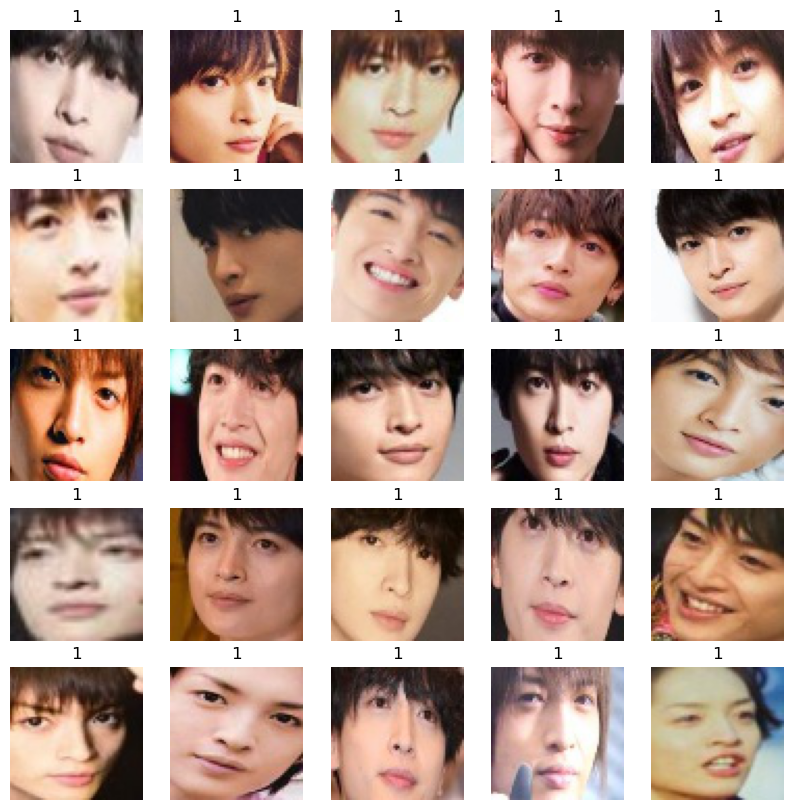

In [7]:
#画像とそのラベルの確認
import matplotlib.pyplot as plt

#画像データ読み込み
photos=np.load("./image1/dataset1.npz")
x=photos['x']
y=photos['y']

#開始インデックス
idx=200

#pyplotで出力
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(y[i+idx])
    plt.axis('off')
    plt.imshow(x[i+idx])
plt.show()